### Import directories 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
le = LabelEncoder()

# Load dataset

In [2]:
df = pd.read_csv('synthetic_asthma.csv')
df

,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Sympotms,Peak_Expiratory_Flow,FeNO_Level,Inhaler,Has_Asthma,Asthma_Control_Level
0,ASTH100000,52,Female,27.6,Former,1,NaN,Moderate,Sedentary,Outdoor,Diabetes,0.38,5,Yes,421.0,37.540,NaN,0,Controlled
1,ASTH100001,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,6,NaN,297.6,27.422,Yes,0,Controlled
2,ASTH100002,72,Female,17.6,Never,0,NaN,Moderate,Moderate,Indoor,NaN,0.38,5,Yes,303.3,31.186,NaN,0,Controlled
3,ASTH100003,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,3,Yes,438.0,39.670,NaN,1,Poorly Controlled
4,ASTH100004,21,Male,30.2,Never,0,NaN,Moderate,Active,Indoor,NaN,0.82,3,Yes,535.0,36.990,NaN,0,Controlled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ASTH109995,70,Male,25.0,Never,0,NaN,Low,Sedentary,Indoor,NaN,0.67,5,Yes,580.6,41.612,NaN,0,Controlled
9996,ASTH109996,78,Female,24.8,Never,0,Pollen,Low,Moderate,Indoor,Diabetes,0.72,3,Yes,417.6,39.412,NaN,0,Controlled
9997,ASTH109997,58,Male,30.1,Former,1,Pollen,Low,Moderate,Indoor,NaN,0.28,5,Yes,459.1,48.952,NaN,1,Not Controlled
9998,ASTH109998,88,Female,31.2,Former,0,Pollen,Moderate,Moderate,Indoor,NaN,0.44,5,Yes,415.9,45.358,NaN,0,Controlled


In [3]:
print(df[['Has_Asthma']])

      Has_Asthma
0              0
1              0
2              0
3              1
4              0
...          ...
9995           0
9996           0
9997           1
9998           0
9999           1

[10000 rows x 1 columns]


In [4]:
df.count()

Patient_ID                 10000
Age                        10000
Gender                     10000
BMI                        10000
Smoking_Status             10000
Family_History             10000
Allergies                   7064
Air_Pollution_Level        10000
Physical_Activity_Level    10000
Occupation_Type            10000
Comorbidities               5033
Medication_Adherence       10000
Number_of_ER_Visits        10000
Sympotms                    8197
Peak_Expiratory_Flow       10000
FeNO_Level                 10000
Inhaler                     1546
Has_Asthma                 10000
Asthma_Control_Level       10000
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               10000 non-null  object 
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   BMI                      10000 non-null  float64
 4   Smoking_Status           10000 non-null  object 
 5   Family_History           10000 non-null  int64  
 6   Allergies                7064 non-null   object 
 7   Air_Pollution_Level      10000 non-null  object 
 8   Physical_Activity_Level  10000 non-null  object 
 9   Occupation_Type          10000 non-null  object 
 10  Comorbidities            5033 non-null   object 
 11  Medication_Adherence     10000 non-null  float64
 12  Number_of_ER_Visits      10000 non-null  int64  
 13  Sympotms                 8197 non-null   object 
 14  Peak_Expiratory_Flow   

In [6]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'BMI', 'Smoking_Status',
       'Family_History', 'Allergies', 'Air_Pollution_Level',
       'Physical_Activity_Level', 'Occupation_Type', 'Comorbidities',
       'Medication_Adherence', 'Number_of_ER_Visits', 'Sympotms',
       'Peak_Expiratory_Flow', 'FeNO_Level', 'Inhaler', 'Has_Asthma',
       'Asthma_Control_Level'],
      dtype='object')

In [7]:
df.describe()

,Age,BMI,Family_History,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,44.930700,25.053320,0.303400,0.497998,4.303800,400.884090,36.241011,0.243300
std,25.653559,4.874466,0.459749,0.224809,1.198269,97.531113,6.638880,0.429096
min,1.000000,15.000000,0.000000,0.000000,3.000000,150.000000,17.088000,0.000000
25%,23.000000,21.600000,0.000000,0.320000,3.000000,334.800000,31.537500,0.000000
50%,45.000000,25.000000,0.000000,0.500000,5.000000,402.500000,35.920000,0.000000
75%,67.000000,28.400000,1.000000,0.670000,5.000000,468.700000,40.562000,0.000000
max,89.000000,45.000000,1.000000,0.990000,6.000000,600.000000,59.338000,1.000000


In [8]:
df.shape


(10000, 19)

## Drop irralivant columns 

In [9]:
df = df.drop(['Patient_ID'], axis=1)

In [10]:
df.columns

Index(['Age', 'Gender', 'BMI', 'Smoking_Status', 'Family_History', 'Allergies',
       'Air_Pollution_Level', 'Physical_Activity_Level', 'Occupation_Type',
       'Comorbidities', 'Medication_Adherence', 'Number_of_ER_Visits',
       'Sympotms', 'Peak_Expiratory_Flow', 'FeNO_Level', 'Inhaler',
       'Has_Asthma', 'Asthma_Control_Level'],
      dtype='object')

In [11]:
df.shape

(10000, 18)

#  Missing values

In [12]:
df.isnull().sum()

Age                           0
Gender                        0
BMI                           0
Smoking_Status                0
Family_History                0
Allergies                  2936
Air_Pollution_Level           0
Physical_Activity_Level       0
Occupation_Type               0
Comorbidities              4967
Medication_Adherence          0
Number_of_ER_Visits           0
Sympotms                   1803
Peak_Expiratory_Flow          0
FeNO_Level                    0
Inhaler                    8454
Has_Asthma                    0
Asthma_Control_Level          0
dtype: int64

In [13]:
df['Allergies'] = df['Allergies'].fillna('None')
df['Comorbidities'] = df['Comorbidities'].fillna('None')

In [14]:
df.isnull().sum()

Age                           0
Gender                        0
BMI                           0
Smoking_Status                0
Family_History                0
Allergies                     0
Air_Pollution_Level           0
Physical_Activity_Level       0
Occupation_Type               0
Comorbidities                 0
Medication_Adherence          0
Number_of_ER_Visits           0
Sympotms                   1803
Peak_Expiratory_Flow          0
FeNO_Level                    0
Inhaler                    8454
Has_Asthma                    0
Asthma_Control_Level          0
dtype: int64

##  Convert all categorical Columns

In [15]:
for c in df.columns:
    if df[c].dtype == 'object' :  
        df[c] = le.fit_transform(df[c])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      10000 non-null  int64  
 1   Gender                   10000 non-null  int64  
 2   BMI                      10000 non-null  float64
 3   Smoking_Status           10000 non-null  int64  
 4   Family_History           10000 non-null  int64  
 5   Allergies                10000 non-null  int64  
 6   Air_Pollution_Level      10000 non-null  int64  
 7   Physical_Activity_Level  10000 non-null  int64  
 8   Occupation_Type          10000 non-null  int64  
 9   Comorbidities            10000 non-null  int64  
 10  Medication_Adherence     10000 non-null  float64
 11  Number_of_ER_Visits      10000 non-null  int64  
 12  Sympotms                 10000 non-null  int64  
 13  Peak_Expiratory_Flow     10000 non-null  float64
 14  FeNO_Level             

In [17]:
df.shape

(10000, 18)

## Find Correlation of dataset

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
correlation = df.corr()
print(correlation)

                              Age    Gender       BMI  Smoking_Status  \
Age                      1.000000 -0.010491 -0.010078       -0.008895   
Gender                  -0.010491  1.000000 -0.007430        0.015604   
BMI                     -0.010078 -0.007430  1.000000        0.018827   
Smoking_Status          -0.008895  0.015604  0.018827        1.000000   
Family_History           0.007481  0.005408 -0.001244        0.011031   
Allergies               -0.011127 -0.008188  0.000029       -0.007057   
Air_Pollution_Level     -0.000059 -0.011290 -0.003241        0.001377   
Physical_Activity_Level -0.009468 -0.003398  0.021542        0.016718   
Occupation_Type          0.006354 -0.000862 -0.009370        0.013770   
Comorbidities           -0.003972 -0.013376 -0.000363        0.000266   
Medication_Adherence    -0.005332 -0.008553 -0.001318       -0.028093   
Number_of_ER_Visits      0.010764 -0.002487 -0.009289       -0.001558   
Sympotms                -0.446658  0.010398 -0.3776

## Heat Map of df Correlation

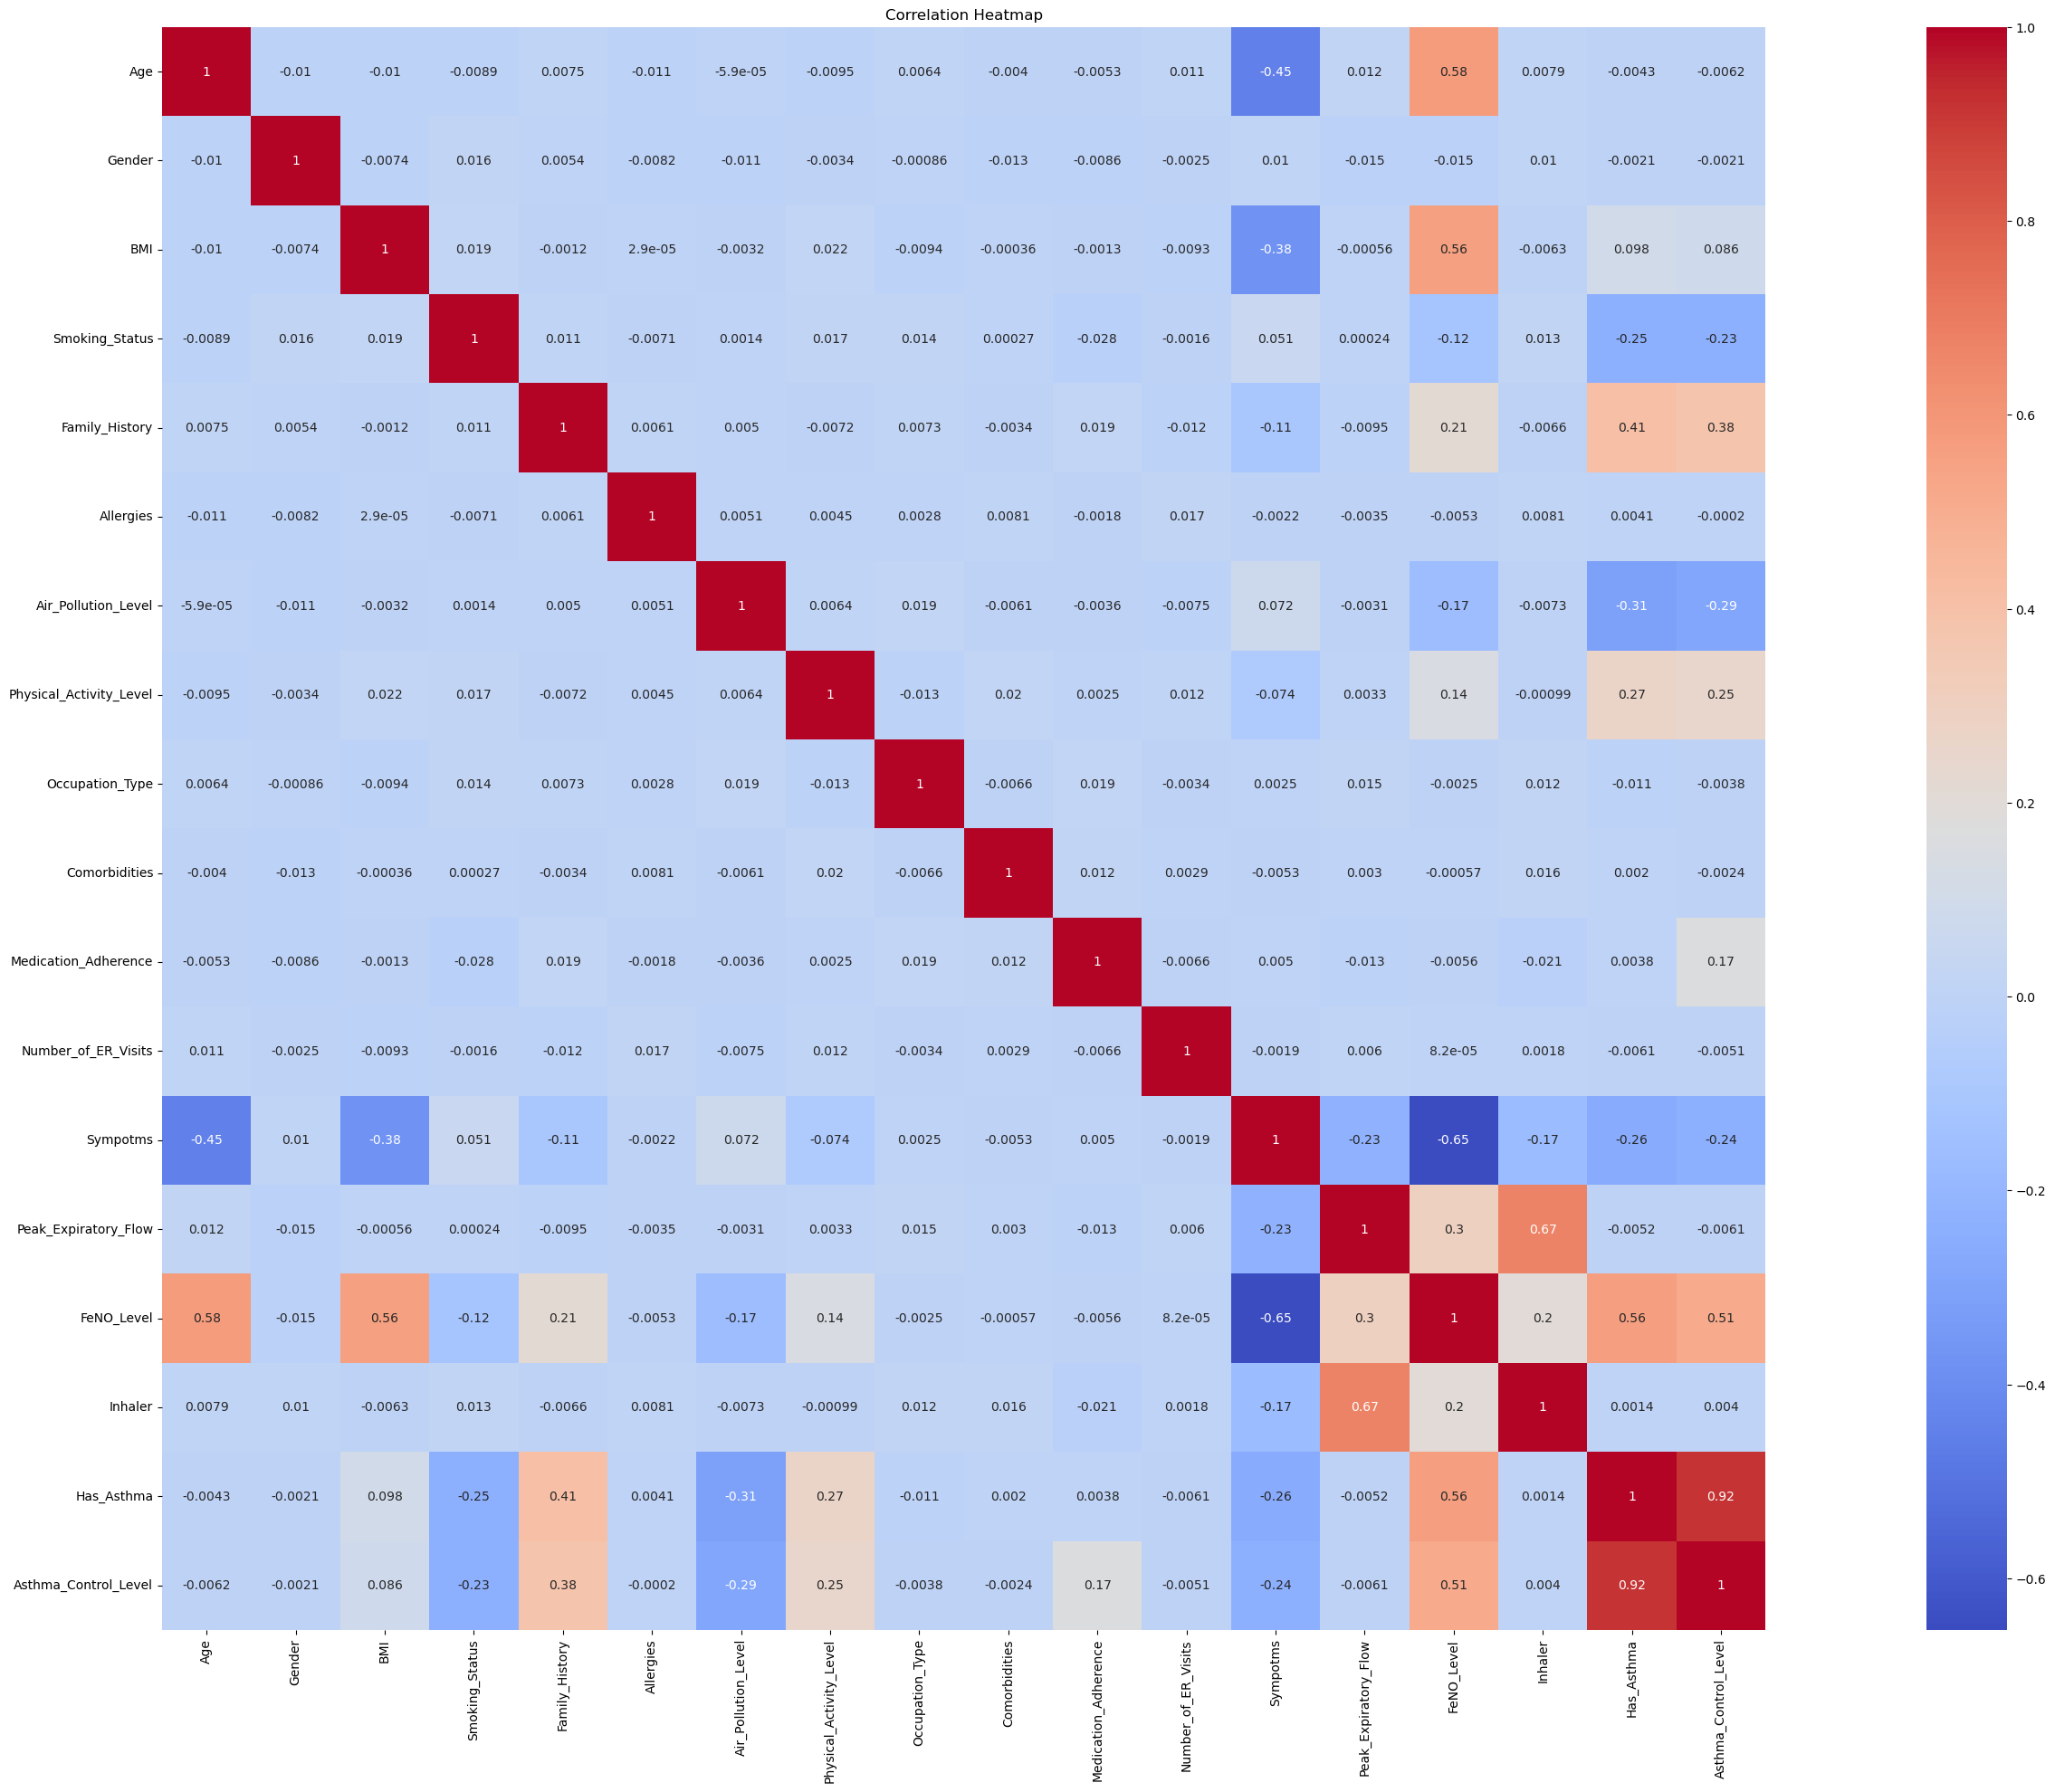

In [20]:
plt.figure(figsize=(46,23))
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


In [21]:
df = df.drop(columns=['Asthma_Control_Level'])

## Classifiation  Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop(['Has_Asthma'], axis=1)  
Y = df['Has_Asthma']  

### Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled [:1]


array([[ 0.27558178, -0.97749697,  0.52247923, -0.63128864,  1.51524879,
         0.02627132,  0.91085138,  1.05732606,  1.54035103, -1.05293058,
        -0.52490841,  0.58103371, -0.46899736,  0.20626152,  0.19567368,
         0.42763537]])

# Train-Test Split


In [25]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split( X_scaled, Y, test_size=0.2, random_state=27)

In [26]:
print("Size of Train X = " , len(X_TRAIN))
print("Size of Train Y = " , len(Y_TRAIN))
print("Size of Test X = " , len(X_TEST))
print("Size of Test Y = " , len(Y_TEST))

Size of Train X =  8000
Size of Train Y =  8000
Size of Test X =  2000
Size of Test Y =  2000


In [27]:
X = X
Y = df['Has_Asthma']

# Appling all models of Classification for better out-come one-by-one

 # 1) Logistic Regression

In [28]:
areeba  = LogisticRegression(solver='liblinear', random_state=27)
areeba.fit(X_TRAIN, Y_TRAIN)
LogisticRegression(random_state=27, solver='liblinear')

LogisticRegression(random_state=27, solver='liblinear')

## Prediction on Train Set 


In [29]:
X_train_prediction = areeba.predict(X_TRAIN)
training_data_accuracy = accuracy_score(X_train_prediction,Y_TRAIN)
print('Accuracy Score OF Training',training_data_accuracy)

Accuracy Score OF Training 1.0


### Confusion Matrics

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
conf_mat = confusion_matrix(Y_TRAIN, X_train_prediction)

In [32]:
print("Confusion Matrix:")

print(conf_mat)

Confusion Matrix:
[[6060    0]
 [   0 1940]]


In [33]:
from sklearn.metrics import ConfusionMatrixDisplay


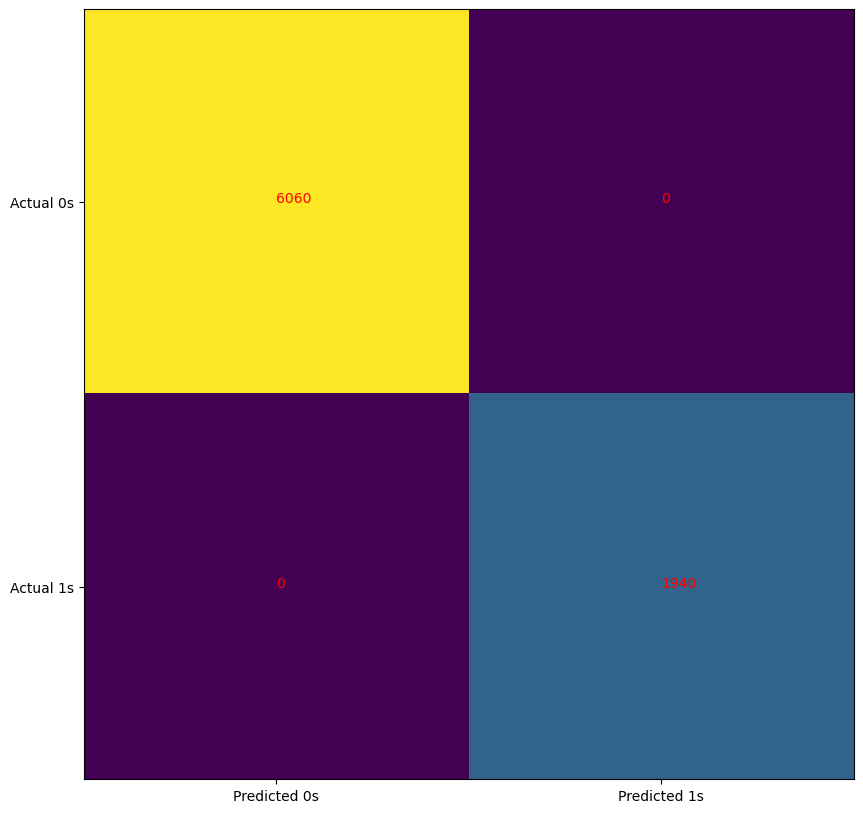

In [34]:
import matplotlib.pyplot as plt
cm =confusion_matrix(Y_TRAIN, X_train_prediction)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], color='red')
plt.show()

## Prediction on Test Set

In [35]:
X_test_prediction = areeba.predict(X_TEST)
test_data_accuracy = accuracy_score(X_test_prediction,Y_TEST)
print('Accuracy Score Test Data',test_data_accuracy)

Accuracy Score Test Data 1.0


##  Confussion Matrix

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_TEST,X_test_prediction)

array([[1507,    0],
       [   0,  493]])

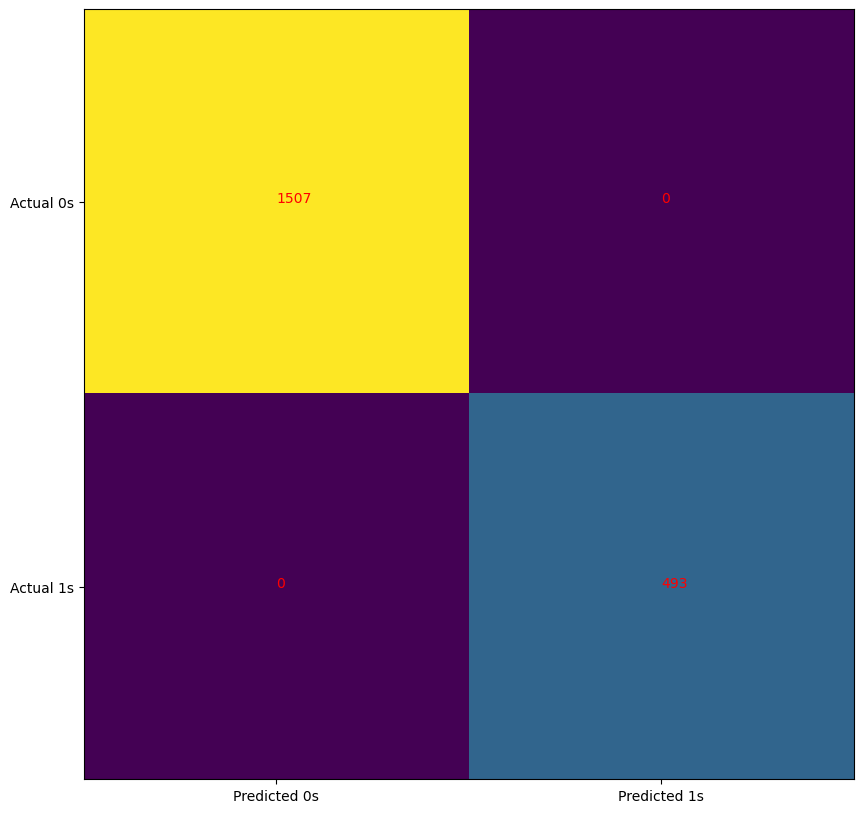

In [37]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TEST, X_test_prediction)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], color='red')
plt.show()

## Classificaiton Report 

In [38]:
report = classification_report(Y_TEST, X_test_prediction)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1507
           1       1.00      1.00      1.00       493

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



# 2) - Naïve Base/Gaussian Naïve Base

In [39]:
from sklearn.naive_bayes import GaussianNB
areeba = GaussianNB()
areeba.fit(X_TRAIN, Y_TRAIN)
GaussianNB()

GaussianNB()

## Perform Predictions on Train DATa set

In [40]:
X_train_prediction = areeba.predict(X_TRAIN)
training_data_accuracy = accuracy_score(X_train_prediction,Y_TRAIN)
print('Accuracy Score OF Training',training_data_accuracy)

Accuracy Score OF Training 0.820375


### Confusion Matrix

In [41]:
confusion_matrix(Y_TRAIN,X_train_prediction)

array([[4658, 1402],
       [  35, 1905]])

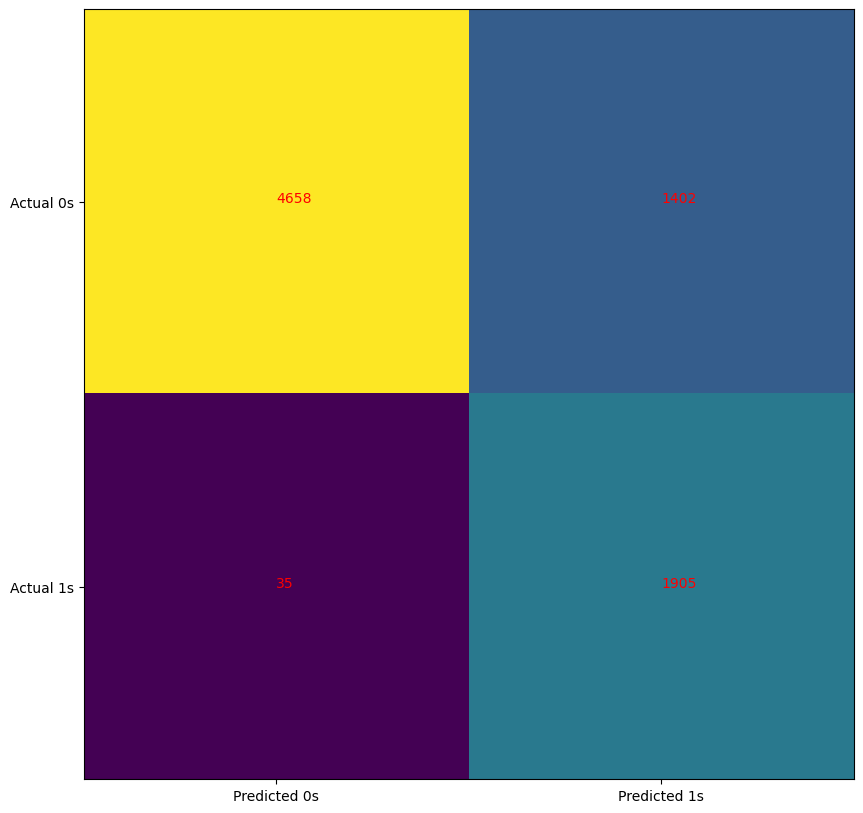

In [42]:
import matplotlib.pyplot as plt
cm =confusion_matrix(Y_TRAIN, X_train_prediction)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], color='red')
plt.show()

## Perform Testing on Testing set

In [43]:
X_test_prediction = areeba.predict(X_TEST)
test_data_accuracy = accuracy_score(X_test_prediction,Y_TEST)
print('Accuracy Score Test Data',test_data_accuracy)

Accuracy Score Test Data 0.813


## Canfsion Matrix

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_TEST,X_test_prediction)

array([[1146,  361],
       [  13,  480]])

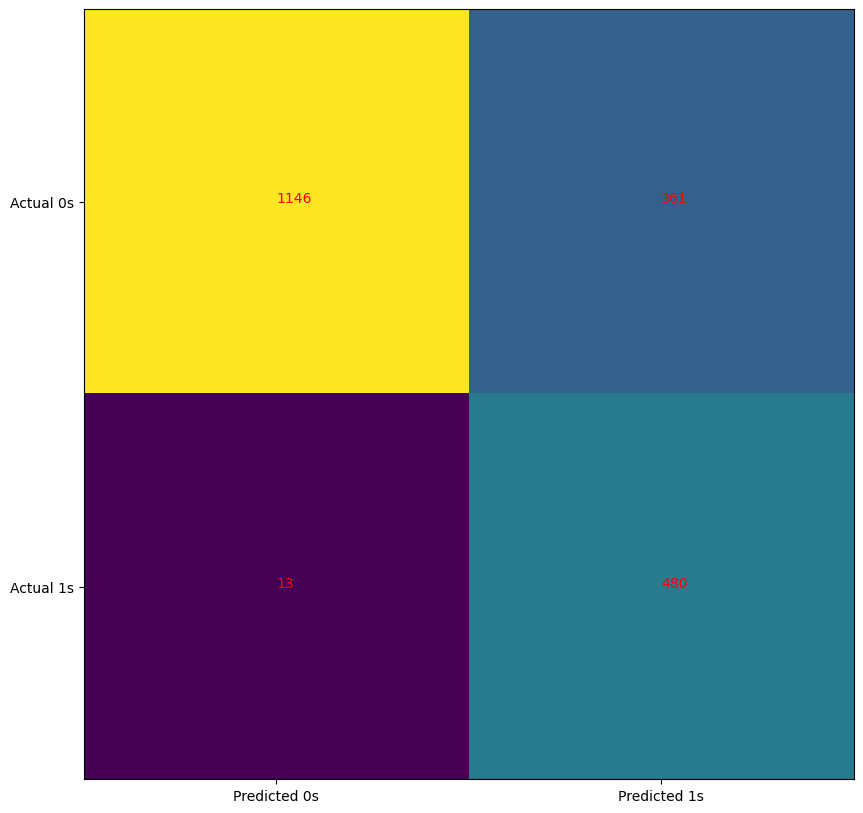

In [45]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TEST, X_test_prediction)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], color='red')
plt.show()

## Classification Report

In [46]:
report = classification_report(Y_TEST, X_test_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.76      0.86      1507
           1       0.57      0.97      0.72       493

    accuracy                           0.81      2000
   macro avg       0.78      0.87      0.79      2000
weighted avg       0.89      0.81      0.83      2000



# 3) Decision Tree

In [47]:
areeba= DecisionTreeClassifier(random_state=27)
areeba.fit(X_TRAIN, Y_TRAIN) 
DecisionTreeClassifier(random_state=27)

DecisionTreeClassifier(random_state=27)

# Perform Training on train set

In [48]:
X_train_prediction = areeba.predict(X_TRAIN)
training_data_accuracy = accuracy_score(X_train_prediction,Y_TRAIN)
print('Accuracy Score OF Training',training_data_accuracy)

Accuracy Score OF Training 1.0


## Draw Canfusion Matreix 

In [49]:
confusion_matrix(Y_TRAIN,X_train_prediction)

array([[6060,    0],
       [   0, 1940]])

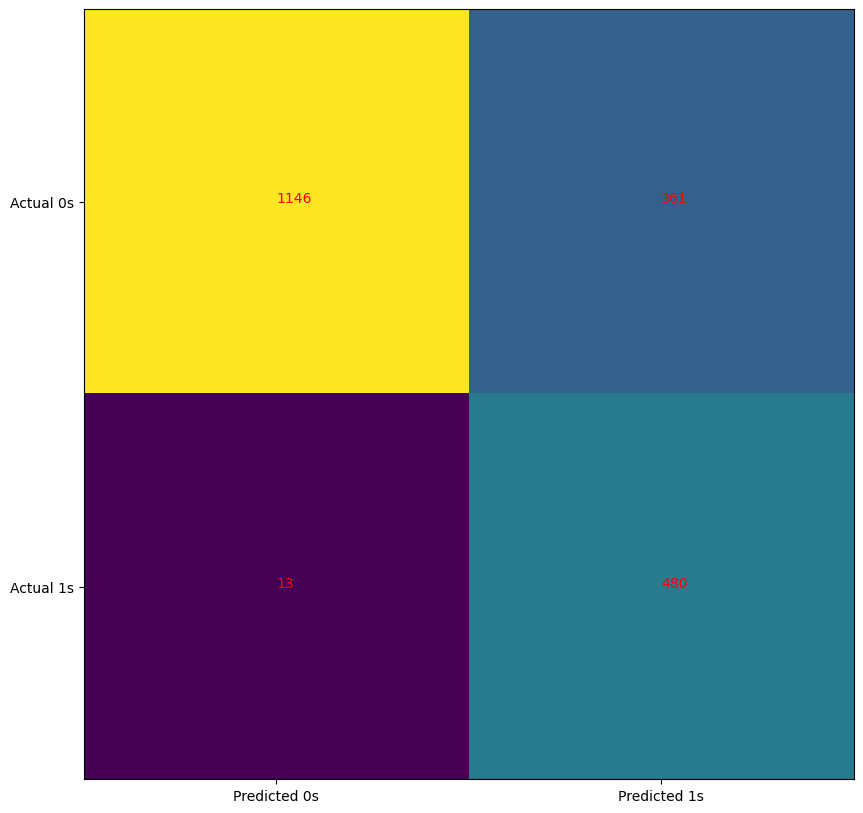

In [50]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TEST, X_test_prediction)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], color='red')
plt.show()

## Prediction on Test Set

In [51]:
X_test_prediction = areeba.predict(X_TEST)
test_data_accuracy = accuracy_score(X_test_prediction,Y_TEST)
print('Accuracy Score Test Data',test_data_accuracy)

Accuracy Score Test Data 0.9885


## Canfusion Matrix 

In [52]:
confusion_matrix(Y_TEST,X_test_prediction)

array([[1494,   13],
       [  10,  483]])

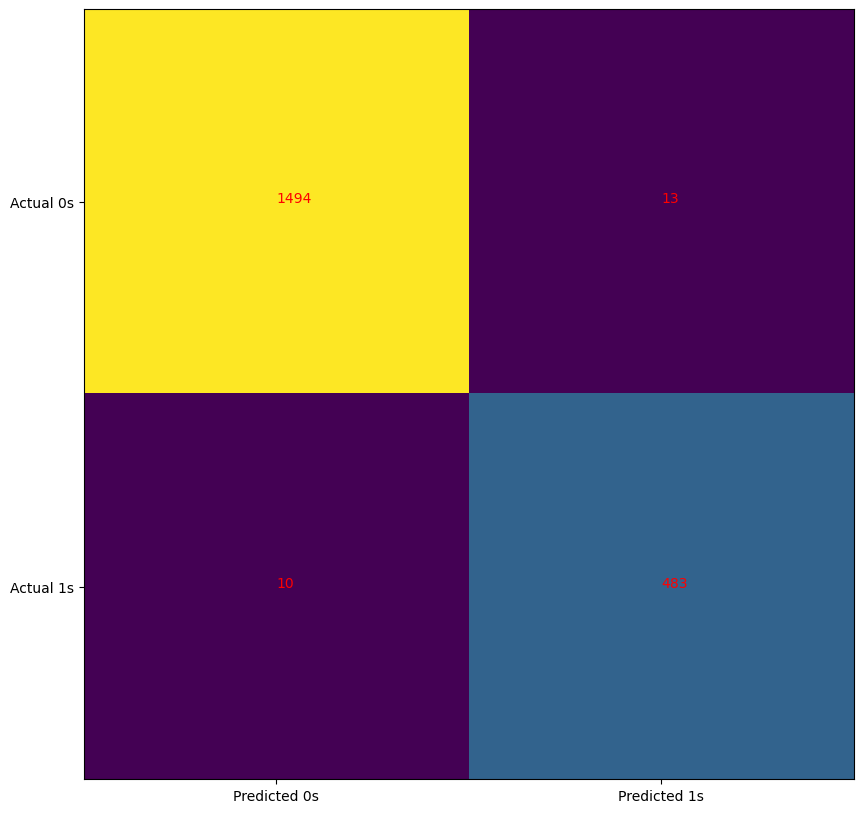

In [53]:
import matplotlib.pyplot as plt
cm =confusion_matrix(Y_TEST,X_test_prediction)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], color='red')
plt.show()

## Classificaion Report

In [54]:
report = classification_report(Y_TEST, X_test_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1507
           1       0.97      0.98      0.98       493

    accuracy                           0.99      2000
   macro avg       0.98      0.99      0.98      2000
weighted avg       0.99      0.99      0.99      2000



# 4) Random Forest

In [55]:
areeba = RandomForestClassifier(n_estimators=27, random_state=27)
areeba.fit(X_TRAIN, Y_TRAIN) 
RandomForestClassifier(n_estimators=27, random_state=27)

RandomForestClassifier(n_estimators=27, random_state=27)

## Perform Training on Trian Data

In [56]:
X_train_prediction = areeba.predict(X_TRAIN)
training_data_accuracy = accuracy_score(X_train_prediction,Y_TRAIN)
print('Accuracy Score OF Training',training_data_accuracy)

Accuracy Score OF Training 0.999875


## Canfusion Metrix

In [57]:
confusion_matrix(Y_TRAIN,X_train_prediction)

array([[6060,    0],
       [   1, 1939]])

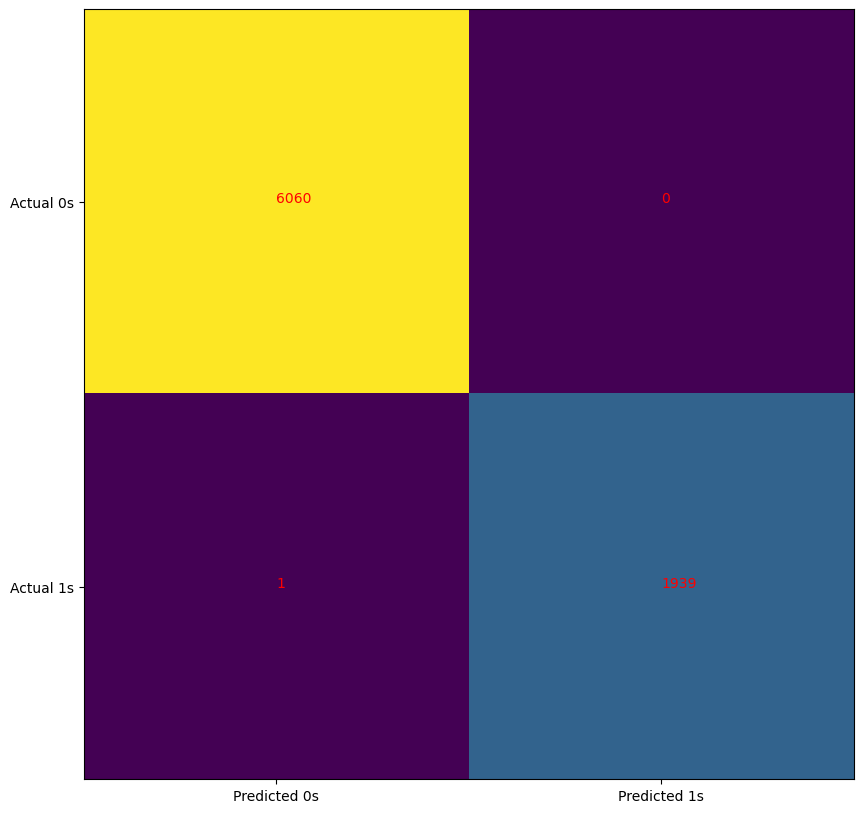

In [58]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TRAIN,X_train_prediction)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], color='red')
plt.show()

## Prediction on TEST Set

In [59]:
X_test_prediction = areeba.predict(X_TEST)
test_data_accuracy = accuracy_score(X_test_prediction,Y_TEST)
print('Accuracy Score Test Data',test_data_accuracy)

Accuracy Score Test Data 0.992


### Confusion Matric

In [60]:
confusion_matrix(Y_TEST,X_test_prediction)

array([[1496,   11],
       [   5,  488]])

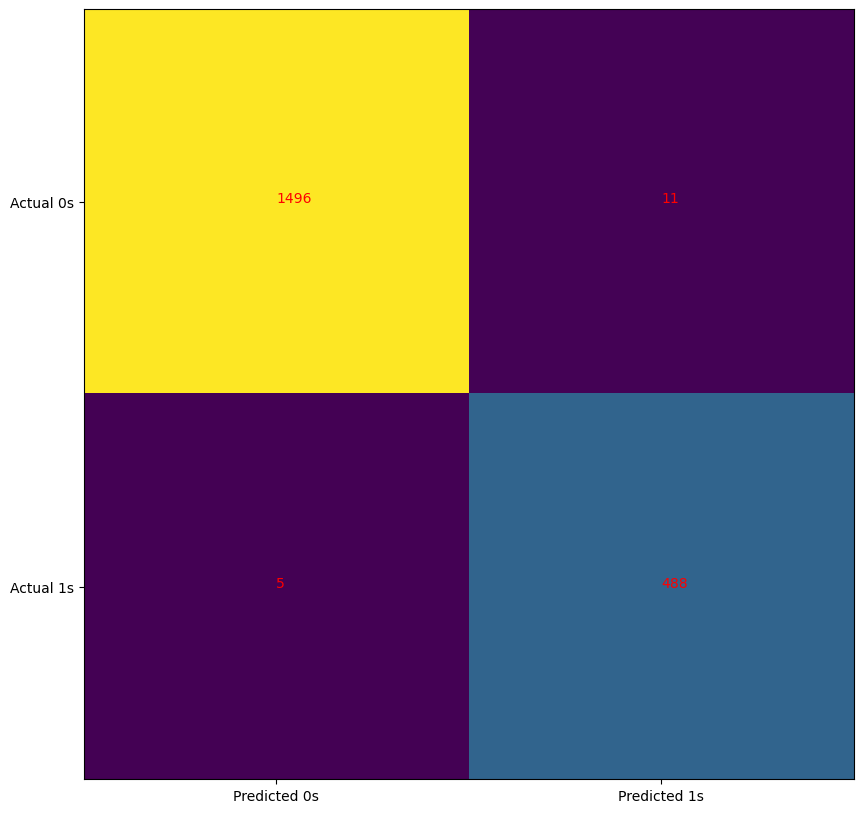

In [61]:
import matplotlib.pyplot as plt
cm =confusion_matrix(Y_TEST, X_test_prediction)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], color='red')
plt.show()

## Classification Report

In [62]:
report = classification_report(Y_TEST, X_test_prediction)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1507
           1       0.98      0.99      0.98       493

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



# 5) SVM

In [63]:
areeba = SVC(kernel='linear')
areeba.fit(X_TRAIN , Y_TRAIN)

SVC(kernel='linear')

## Predictions on Traing data

In [64]:
X_train_prediction = areeba.predict(X_TRAIN)
training_data_accuracy = accuracy_score(X_train_prediction, Y_TRAIN)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


## Canfusion Matrix

In [65]:
confusion_matrix(Y_TRAIN,X_train_prediction)

array([[6060,    0],
       [   0, 1940]])

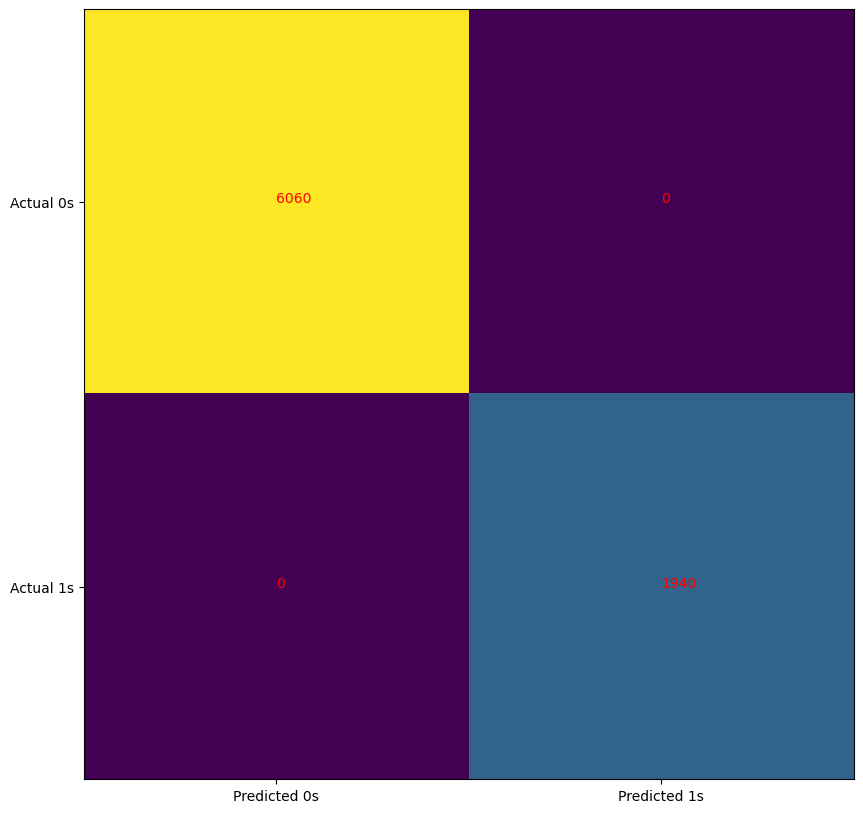

In [66]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TRAIN,X_train_prediction)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], color='red')
plt.show()

## Perform Testing on TEST Set

In [67]:
X_test_prediction = areeba.predict(X_TEST)
test_data_accuracy = accuracy_score(X_test_prediction,Y_TEST)
print('Accuracy Score Test Data',test_data_accuracy)

Accuracy Score Test Data 1.0


## Canfusion Matrix

In [68]:
confusion_matrix(Y_TEST,X_test_prediction)

array([[1507,    0],
       [   0,  493]])

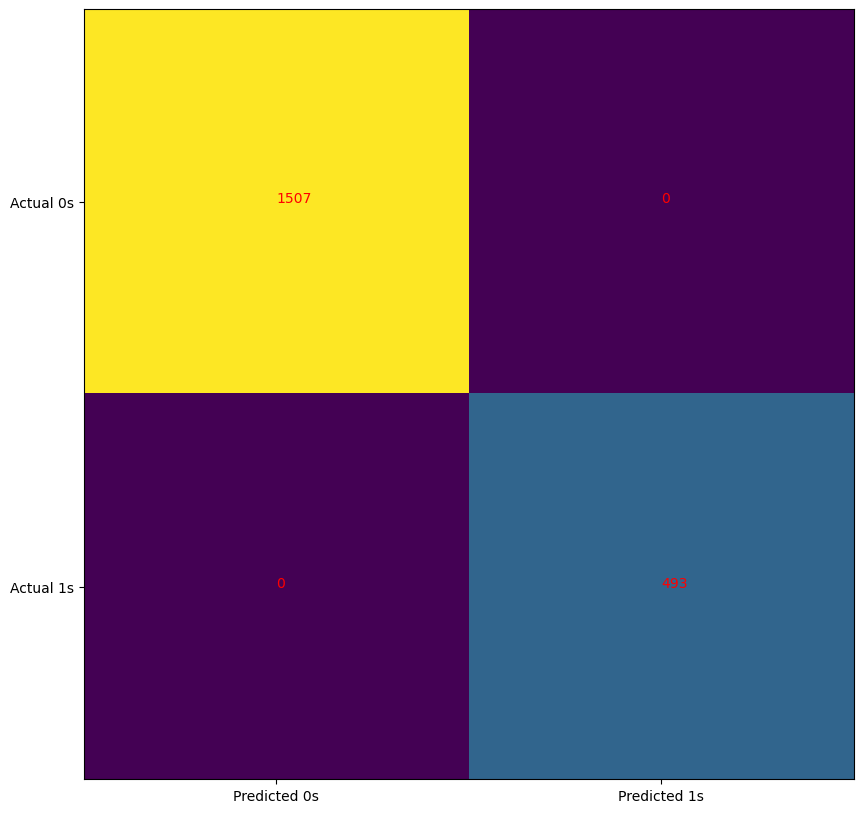

In [69]:
import matplotlib.pyplot as plt
cm =confusion_matrix(Y_TEST, X_test_prediction)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], color='red')
plt.show()

In [70]:
report = classification_report(Y_TEST, X_test_prediction)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1507
           1       1.00      1.00      1.00       493

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

